# FML Project

### Including Libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
import seaborn as sns

### Data Preprocessing and Analysis

     X  Y month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain   area
0    7  5   mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00
1    7  4   oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00
2    7  4   oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00
3    8  6   mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00
4    8  6   mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00
..  .. ..   ...  ...   ...    ...    ...   ...   ...  ..   ...   ...    ...
512  4  3   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44
513  2  4   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29
514  7  4   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16
515  1  4   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00
516  6  3   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00

[517 rows x 13 columns]
Correlation Matrix for area: 
 area     1.000000
month    0.130

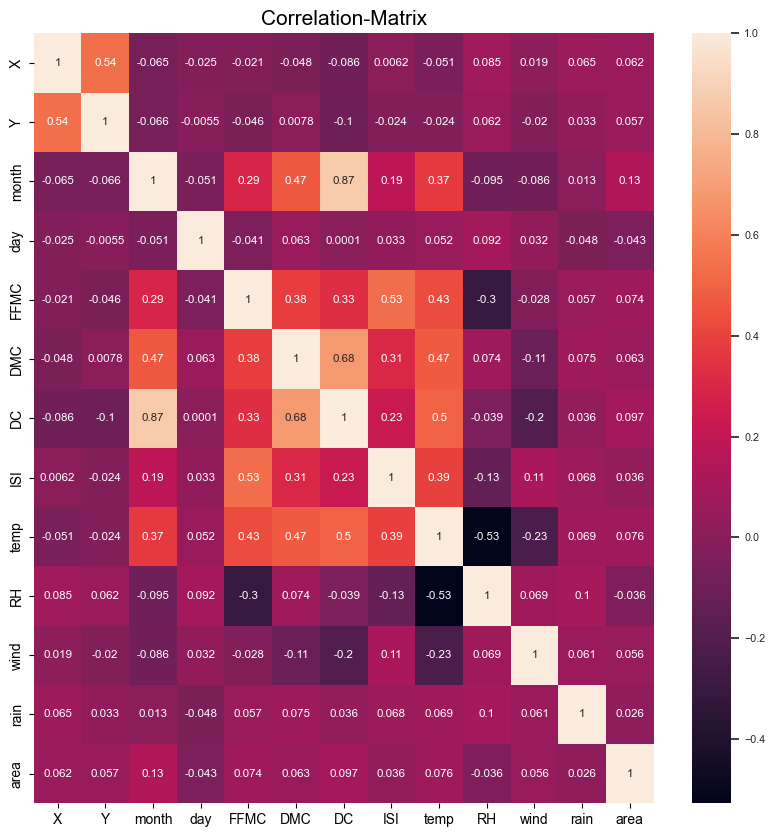

In [2]:
#ignoring Warnings
warnings.filterwarnings(action="ignore")

#reading the dataset from csv file
firesDataSet = pd.read_csv("forestfires.csv")   
print(firesDataSet)

#mapping the days with number 
firesDataSet.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

#Mapping month with days
firesDataSet.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)

#If fire area is greater than zero that fire happens 
# 0 = No Fire and 1 = Fire   
firesDataSet['area'].values[firesDataSet['area'].values > 0] = 1

#Finding correlation
fireCorr=firesDataSet.corr()
plt.figure(figsize = (10,10))
plt.title("Correlation-Matrix",fontdict={"size":15})
sns.set(font_scale=0.7) # for label size
sns.heatmap(fireCorr,annot=True,cmap="rocket") # font size

fireCorr = firesDataSet.corr()['area'].sort_values(ascending=False)
print(f'Correlation Matrix for area: \n {fireCorr}')

#seperating Output
fireDataOutput = firesDataSet['area'].copy()
fireDataInput = firesDataSet.drop('area',axis=1)
print(f'Output Data\n{fireDataOutput}')

#Standarizing Dataset
#NormalizeData  = (input - mean)/std
dataMeanVal = fireDataInput.mean()
dataStdVal = fireDataInput.std()
stdData = (fireDataInput - dataMeanVal)/dataStdVal
print(f"Input Data:\n{stdData}")



### DataSet splitting into training (80%), validation (10%) and testing (10%)

In [3]:
#Testing Tranning Validation Split of data
XTrain, XTest, YTrain, YTest = train_test_split(stdData,fireDataOutput,test_size=0.1,random_state=42)
XTrain, XVal, YTrain, YVal = train_test_split(XTrain,YTrain,test_size=0.11,random_state=42)

### K-Nearest Neighbors

-------------------------------KNN--------------------------------
Precision for k = 7: 0.625
Recall: 0.7142857142857143
Accuracy: 0.6153846153846154
-------------------------------------------------------------------
Classifiction report:
              precision    recall  f1-score   support

         0.0       0.60      0.50      0.55        24
         1.0       0.62      0.71      0.67        28

    accuracy                           0.62        52
   macro avg       0.61      0.61      0.61        52
weighted avg       0.61      0.62      0.61        52

-------------------------------------------------------------------


<Axes: title={'center': 'KNN Confusion-Matrix'}>

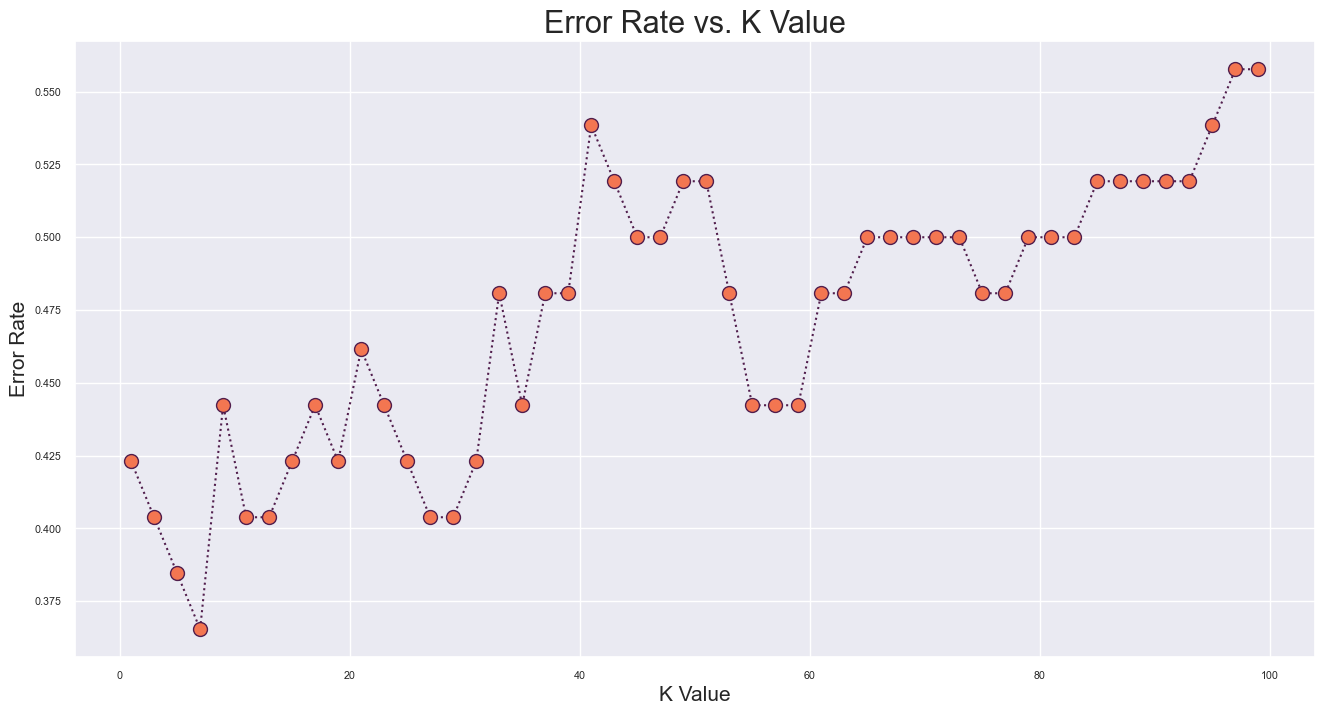

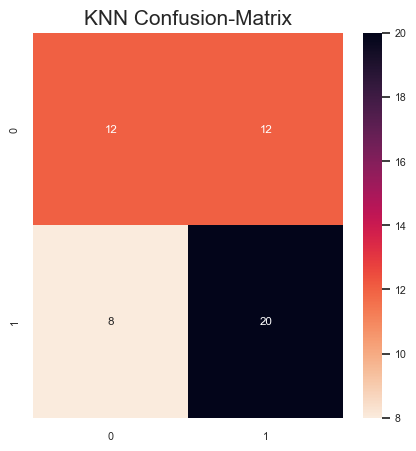

In [7]:
#Empty List to store error values
ErrorRate = [] 
for k in range (1, 100, 2):
    KNearestNeighborModel = KNeighborsClassifier(n_neighbors= k)
    KNearestNeighborModel.fit(XTrain, YTrain)
    PredictionKNN = KNearestNeighborModel.predict(XVal)
    ErrorRate.append(np.mean(PredictionKNN != YVal))
    
for i in range(len(ErrorRate)):
    if ErrorRate[i] == min(ErrorRate):
        K = (i*2) + 1 #Mapping K w.r.t errorList
        break    

#Plotting Error List w.r.t K values
plt.figure(figsize=(16,8))
plt.plot(range(1,100, 2), ErrorRate, color='#511e4d', linestyle='dotted', marker='o', markerfacecolor='#f37651', markersize=10)
plt.grid(color="white")
plt.title('Error Rate vs. K Value', fontdict = {'size' : 22})
plt.xlabel('K Value', fontdict = {'size' : 15})
plt.ylabel('Error Rate', fontdict = {'size' : 15})

#Traning Model
KNN = KNeighborsClassifier(n_neighbors = K)
KNN.fit(XTrain, YTrain)
predictions = KNN.predict(XTest)

#finding precision,recall,accuracy
print("-------------------------------KNN--------------------------------")
print(f"Precision for k = {K}:",metrics.precision_score(YTest, predictions))
print("Recall:",metrics.recall_score(YTest, predictions))
print("Accuracy:",metrics.accuracy_score(YTest, predictions))
print("-------------------------------------------------------------------")
print(f"Classifiction report:\n{classification_report(YTest,predictions)}")
print("-------------------------------------------------------------------")

#Plotting confusion Matrix
conf_matrix = confusion_matrix(YTest,predictions)
plt.figure(figsize = (5,5))
plt.title("KNN Confusion-Matrix",fontdict={"size":15})
sns.heatmap(conf_matrix, annot=True,cmap = "rocket_r")

### Decision Tree

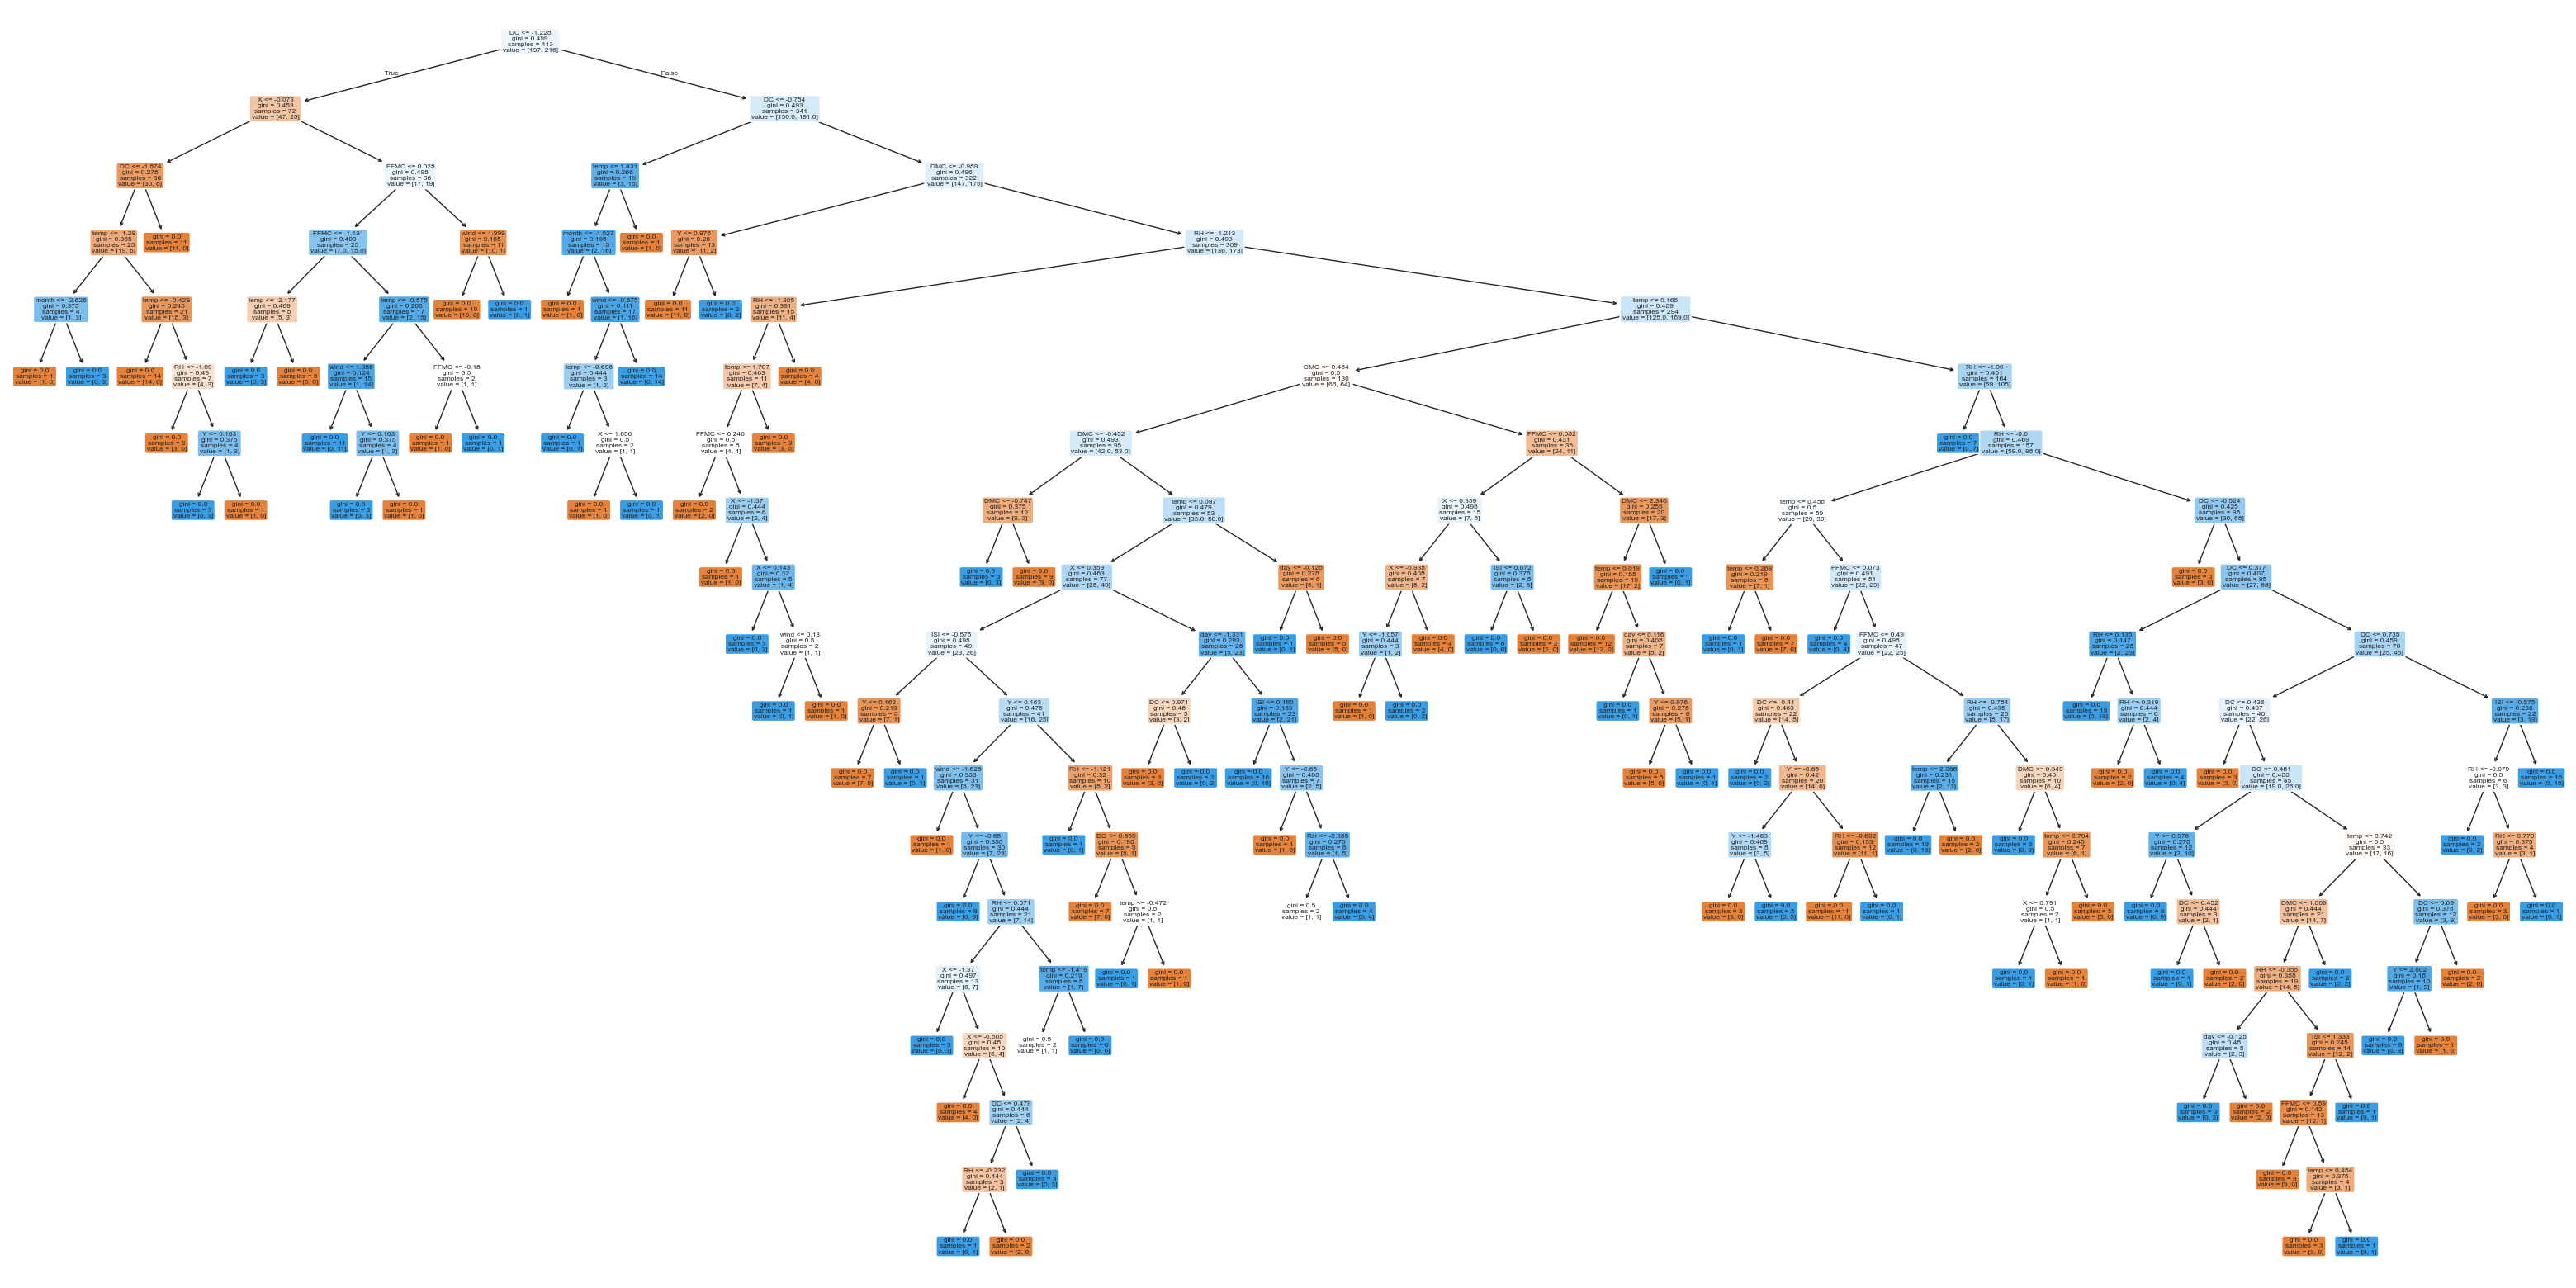

--------------------------Decision-Tree---------------------------
Precision: 0.6153846153846154
Recall: 0.5714285714285714
Accuracy: 0.5769230769230769
-------------------------------------------------------------------
Classifiction report:
              precision    recall  f1-score   support

         0.0       0.54      0.58      0.56        24
         1.0       0.62      0.57      0.59        28

    accuracy                           0.58        52
   macro avg       0.58      0.58      0.58        52
weighted avg       0.58      0.58      0.58        52

-------------------------------------------------------------------


<Axes: title={'center': 'Decision Tree: Confusion-Matrix'}>

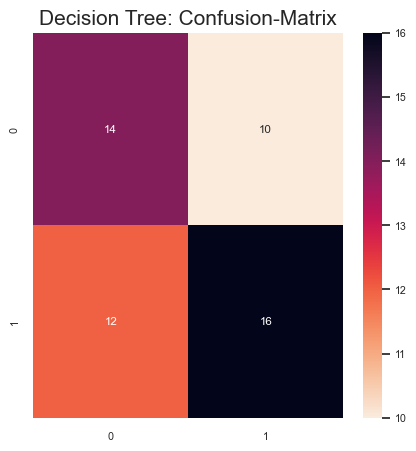

In [ ]:
# Tranning Model
DTree = DecisionTreeClassifier()
DTree.fit(XTrain, YTrain)
predictions = DTree.predict(XTest)

#Ploting the tree
from sklearn import tree
plt.figure(figsize=(40,20))
xLabels = XVal.columns.copy()  
_ = tree.plot_tree(DTree, feature_names = xLabels, 
             filled=True, fontsize=6, rounded = True)
plt.show()

#finding precision,recall,accuracy
print("--------------------------Decision-Tree---------------------------")
print("Precision:",metrics.precision_score(YTest, predictions))
print("Recall:",metrics.recall_score(YTest, predictions))
print("Accuracy:",metrics.accuracy_score(YTest, predictions))
print("-------------------------------------------------------------------")
print(f"Classifiction report:\n{classification_report(YTest,predictions)}")
print("-------------------------------------------------------------------")

#Plotting confusion Matrix
conf_matrix = confusion_matrix(YTest,predictions)
plt.figure(figsize = (5,5))
plt.title("Decision Tree: Confusion-Matrix",fontdict={"size":15})
sns.heatmap(conf_matrix, annot=True,cmap = "rocket_r")


### Support Vector Machine

------------------------------S-V-M-------------------------------
Precision: 0.5853658536585366
Recall: 0.8571428571428571
Accuracy: 0.5961538461538461
-------------------------------------------------------------------
Classifiction report:
              precision    recall  f1-score   support

         0.0       0.64      0.29      0.40        24
         1.0       0.59      0.86      0.70        28

    accuracy                           0.60        52
   macro avg       0.61      0.57      0.55        52
weighted avg       0.61      0.60      0.56        52

-------------------------------------------------------------------


<Axes: title={'center': 'SVM : Confusion-Matrix'}>

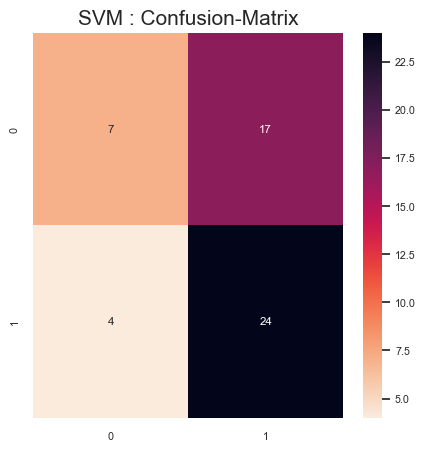

In [204]:
svc = SVC()
svc.fit(XTrain,YTrain)
predictions = svc.predict(XTest)

#finding precision,recall,accuracy
print("------------------------------S-V-M-------------------------------")
print("Precision:",metrics.precision_score(YTest, predictions))
print("Recall:",metrics.recall_score(YTest, predictions))
print("Accuracy:",metrics.accuracy_score(YTest, predictions))
print("-------------------------------------------------------------------")
print(f"Classifiction report:\n{classification_report(YTest,predictions)}")
print("-------------------------------------------------------------------")

#Plotting confusion Matrix
conf_matrix = confusion_matrix(YTest,predictions)
plt.figure(figsize = (5,5))
plt.title("SVM : Confusion-Matrix",fontdict={"size":15})
sns.heatmap(conf_matrix, annot=True,cmap = "rocket_r")

### Logistic-Regression

------------------------Logistic-Regression------------------------
Precision: 0.5833333333333334
Recall: 0.75
Accuracy: 0.5769230769230769
-------------------------------------------------------------------
Classifiction report:
              precision    recall  f1-score   support

         0.0       0.56      0.38      0.45        24
         1.0       0.58      0.75      0.66        28

    accuracy                           0.58        52
   macro avg       0.57      0.56      0.55        52
weighted avg       0.57      0.58      0.56        52

-------------------------------------------------------------------


<Axes: title={'center': 'Logistic-Regression: Confusion-Matrix'}>

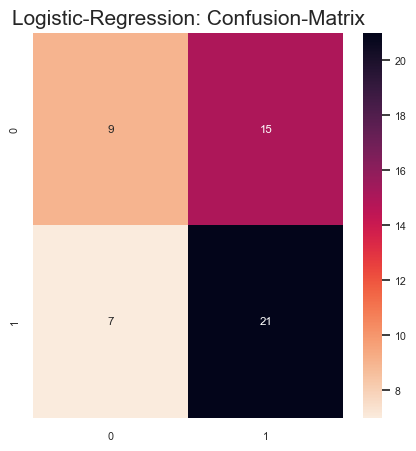

In [188]:
from sklearn.linear_model import LogisticRegression #importing function for LR

logisticModel = LogisticRegression()
logisticModel.fit(XTrain,YTrain)

predictions = logisticModel.predict(XTest)

#finding precision,recall,accuracy
print("------------------------Logistic-Regression------------------------")
print("Precision:",metrics.precision_score(YTest, predictions))
print("Recall:",metrics.recall_score(YTest, predictions))
print("Accuracy:",metrics.accuracy_score(YTest, predictions))
print("-------------------------------------------------------------------")
print(f"Classifiction report:\n{classification_report(YTest,predictions)}")
print("-------------------------------------------------------------------")

#Plotting confusion Matrix
conf_matrix = confusion_matrix(YTest,predictions)
plt.figure(figsize = (5,5))
plt.title("Logistic-Regression: Confusion-Matrix",fontdict={"size":15})
sns.heatmap(conf_matrix, annot=True,cmap = "rocket_r")

### Naive Bayes

--------------------Bernoulli Naive Bayes--------------------
Precision for validation set: 0.5172413793103449
Accuracy for validation set: 0.5192307692307693

---------------------Gaussian Naive Bayes---------------------
Precision for validation set: 0.6470588235294118
Accuracy for validation set: 0.5961538461538461

------For Test Data we use Gaussian Naive Bayes Model:-------
Accuracy: 0.46153846153846156
Precision: 0.5
Recall: 0.2857142857142857
--------------------------------------------------------------
Classifiction report:
              precision    recall  f1-score   support

         0.0       0.56      0.38      0.45        24
         1.0       0.58      0.75      0.66        28

    accuracy                           0.58        52
   macro avg       0.57      0.56      0.55        52
weighted avg       0.57      0.58      0.56        52

--------------------------------------------------------------


<Axes: title={'center': 'Naive Bayes: Confusion-Matrix'}>

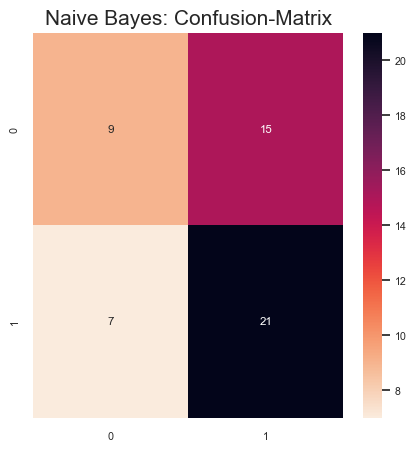

In [189]:
print("--------------------Bernoulli Naive Bayes--------------------")
# Checking Model precision for Bernoulli Naive Bayes
B_NB = BernoulliNB()
B_NB.fit(XTrain,YTrain)
predict = B_NB.predict(XVal)
print(f"Precision for validation set: {metrics.precision_score(YVal, predict)}")
print(f"Accuracy for validation set: {metrics.accuracy_score(YVal, predict)}")

print("\n---------------------Gaussian Naive Bayes---------------------")
# Checking Model precision for Gaussian Naive Bayes
G_NB = GaussianNB()
G_NB.fit(XTrain,YTrain)
predict = G_NB.predict(XVal)
print(f"Precision for validation set: {metrics.precision_score(YVal, predict)}")
print(f"Accuracy for validation set: {metrics.accuracy_score(YVal, predict)}")

# Since we are getting High accuracy in Gaussian Naive Bayes
# So we will use Gaussian Naive Bayes Model

# Perform Testing with Gaussian Naive Bayes Model
predictTest = G_NB.predict(XTest)
print("\n------For Test Data we use Gaussian Naive Bayes Model:-------")
print("Accuracy:",metrics.accuracy_score(YTest, predictTest))
print("Precision:",metrics.precision_score(YTest, predictTest))
print("Recall:",metrics.recall_score(YTest, predictTest))
print("--------------------------------------------------------------")
print(f"Classifiction report:\n{classification_report(YTest,predictions)}")
print("--------------------------------------------------------------")

#Plotting confusion Matrix
conf_matrix = confusion_matrix(YTest,predictions)
plt.figure(figsize = (5,5))
plt.title("Naive Bayes: Confusion-Matrix",fontdict={"size":15})
sns.heatmap(conf_matrix, annot=True,cmap = "rocket_r")

### Neural Network

--------------------Neural Network--------------------
------------------Model Architecture--------------------
FireClassifier(
  (hidden1): Linear(in_features=12, out_features=12, bias=True)
  (act1): ReLU()
  (output): Linear(in_features=12, out_features=1, bias=True)
  (act_output): Sigmoid()
)
-------------------------------------------------------------------
Precision: 0.6206896551724138
Recall: 0.6428571428571429
Accuracy: 0.5961538461538461
-------------------------------------------------------------------
Classifiction report:
              precision    recall  f1-score   support

         0.0       0.57      0.54      0.55        24
         1.0       0.62      0.64      0.63        28

    accuracy                           0.60        52
   macro avg       0.59      0.59      0.59        52
weighted avg       0.60      0.60      0.60        52

-------------------------------------------------------------------


<Axes: title={'center': 'Neural Network: Confusion-Matrix'}>

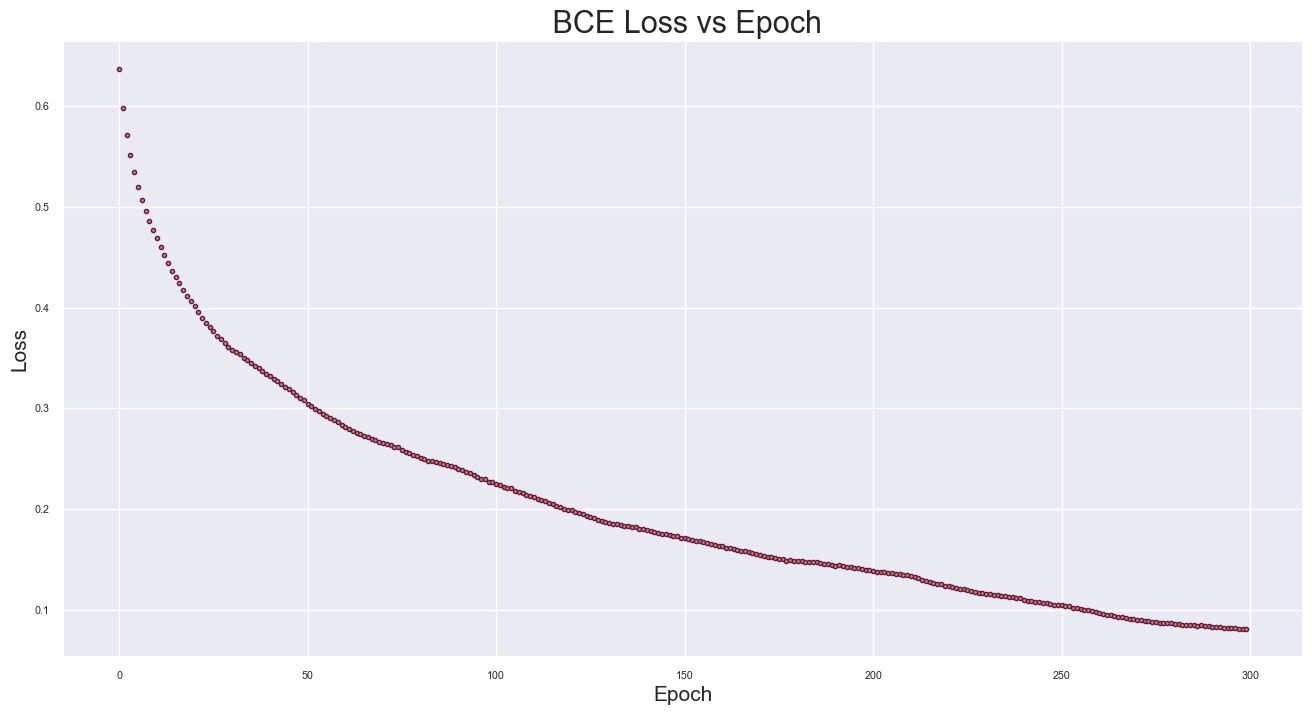

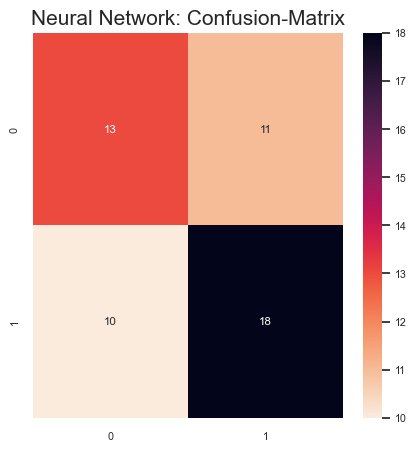

In [11]:
#2layers, n_epochs=300, batch_size=10
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd
from sklearn import metrics

print("--------------------Neural Network--------------------")
#Converting float64 numpy data to float32 tensor data
X = torch.tensor(XTrain.to_numpy(),dtype=torch.float32)
y = torch.tensor(YTrain.to_numpy(), dtype=torch.float32).reshape(-1, 1)
X_val = torch.tensor(XVal.to_numpy(),dtype=torch.float32)
y_val = torch.tensor(YVal.to_numpy(), dtype=torch.float32).reshape(-1, 1)
X_test = torch.tensor(XTest.to_numpy(),dtype=torch.float32)
y_test = torch.tensor(YTest.to_numpy(), dtype=torch.float32).reshape(-1, 1)


#Defining Model
class FireClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(12, 12)
        self.act1 = nn.ReLU()
        self.output = nn.Linear(12, 1)
        self.act_output = nn.Sigmoid()

    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act_output(self.output(x))
        return x

model = FireClassifier()
print("------------------Model Architecture--------------------")
print(model)

# binary cross entropy
loss_fn = nn.BCELoss()  
optimizer = optim.Adam(model.parameters(), lr=0.001)

#Training Model
n_epochs = 300
batch_size = 10

epochList = []
lossList = []
for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = y[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    epochList.append(epoch)
    lossList.append(float(loss))
    
plt.figure(figsize=(16,8))
plt.plot(epochList, lossList, color='#511e4d', linestyle='', marker='.', markerfacecolor='#f37651', markersize=6)
plt.grid(color="white")
plt.title(' BCE Loss vs Epoch', fontdict = {'size' : 22})
plt.xlabel('Epoch', fontdict = {'size' : 15})
plt.ylabel('Loss', fontdict = {'size' : 15})

with torch.no_grad():
    y_pred_test = model(X_test)

#finding precision,recall,accuracy
print("-------------------------------------------------------------------")
print("Precision:",metrics.precision_score(YTest,  y_pred_test.round()))
print("Recall:",metrics.recall_score(YTest,  y_pred_test.round()))
print("Accuracy:",metrics.accuracy_score(YTest,  y_pred_test.round()))
print("-------------------------------------------------------------------")
print(f"Classifiction report:\n{classification_report(YTest, y_pred_test.round())}")
print("-------------------------------------------------------------------")

confusion_matrix = metrics.confusion_matrix(y_test, y_pred_test.round())
plt.figure(figsize = (5,5))
plt.title("Neural Network: Confusion-Matrix",fontdict={"size":15})
sns.heatmap(confusion_matrix, annot=True,cmap = "rocket_r")